## 1. Introdução
Implementaremos a regressão linear utilizando a biblioteca autograd para calcular os gradientes.



Eu gostaria de prever o comportamento da ação PETR4 porque isso permite realizar operações lucrativas com antecedência

## 2. Coleta de Dados

In [72]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad

# Definir o ticker da ação PETR4 e coletar dados históricos
ticker = 'PETR4.SA'
dados = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Exibir as primeiras linhas dos dados
dados.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,,
2020-01-02 00:00:00+00:00,10.621439,30.700001,30.700001,30.309999,30.510000,37774500
2020-01-03 00:00:00+00:00,10.534945,30.450001,31.240000,30.450001,30.879999,71595600
2020-01-06 00:00:00+00:00,10.659497,30.809999,30.940001,29.950001,30.430000,81844000
2020-01-07 00:00:00+00:00,10.617978,30.690001,30.879999,30.469999,30.820000,32822000
2020-01-08 00:00:00+00:00,10.552244,30.500000,30.770000,30.240000,30.690001,48215600


## 3. Análise e Pré-processamento dos Dados

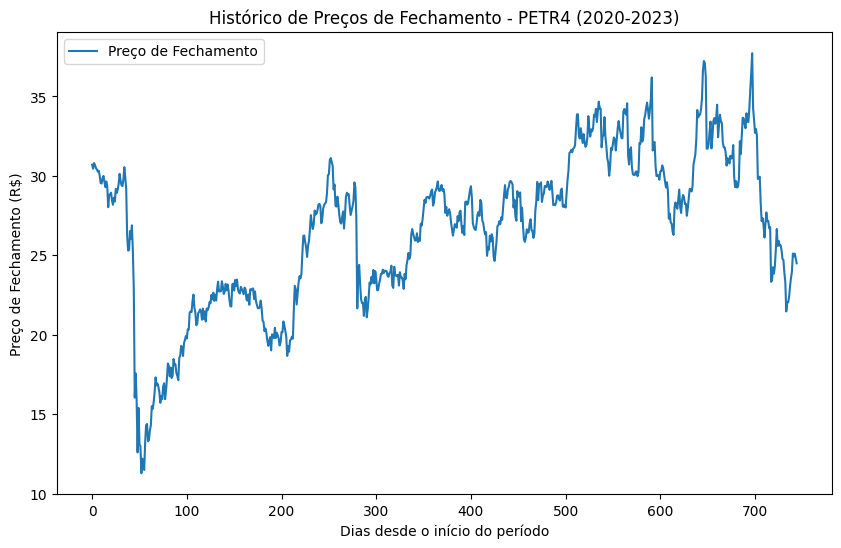

In [73]:
# Vamos focar no preço de fechamento ('Close'), e remover possíveis valores ausentes.
dados = dados[['Close']].dropna()

# Criar uma coluna para representar os dias (como variável independente)
dados['Days'] = range(len(dados))

# Visualizar os dados de fechamento da ação
plt.figure(figsize=(10,6))
plt.plot(dados['Days'], dados['Close'], label='Preço de Fechamento')
plt.title('Histórico de Preços de Fechamento - PETR4 (2020-2023)')
plt.xlabel('Dias desde o início do período')
plt.ylabel('Preço de Fechamento (R$)')
plt.legend()
plt.show()


## 4. Divisão dos Dados em Treino e Teste

In [74]:
X = np.array(dados['Days']).reshape(-1, 1)
y = np.array(dados['Close']).reshape(-1, 1)

# Dividindo os dados em treino (70%) e teste (30%)
split_idx = int(0.7 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


## 5. Implementação da Regressão Linear com autograd

In [75]:
import autograd.numpy as np  # Certifique-se de usar autograd.numpy
from autograd import grad

# Função de modelo linear
def modelo_linear(params, X):
    W, b = params
    return X @ W + b

# Função de custo (erro quadrático médio)
def custo(params, X, y):
    previsao = modelo_linear(params, X)
    erro = previsao - y
    return np.mean(erro**2)

# Gradiente da função de custo
grad_custo = grad(custo)

# Inicializando pesos e viés de acordo com o número de características
n_caracteristicas = X_train.shape[1]  # Número de colunas em X_train
W = np.random.randn(n_caracteristicas, 1)  # W deve ter o mesmo número de características
b = np.random.randn(1)  # b é um escalar
params = [W, b]  # params é uma lista contendo W e b

# Treinamento
taxa_aprendizado = 0.00001
n_iteracoes = 100000

for i in range(n_iteracoes):
    gradientes = grad_custo(params, X_train, y_train)
    params[0] -= taxa_aprendizado * gradientes[0]  # Atualizando W
    params[1] -= taxa_aprendizado * gradientes[1]  # Atualizando b
    if i % 100 == 0:
        print(f"Iteração {i}: Custo = {custo(params, X_train, y_train)}")


Iteração 0: Custo = 89192.65926387202
Iteração 100: Custo = 132.22597183349217
Iteração 200: Custo = 132.10688548750124
Iteração 300: Custo = 131.98791851048608
Iteração 400: Custo = 131.86907078279438
Iteração 500: Custo = 131.75034218489375
Iteração 600: Custo = 131.63173259737178
Iteração 700: Custo = 131.51324190093553
Iteração 800: Custo = 131.3948699764118
Iteração 900: Custo = 131.2766167047468
Iteração 1000: Custo = 131.15848196700603
Iteração 1100: Custo = 131.04046564437428
Iteração 1200: Custo = 130.9225676181554
Iteração 1300: Custo = 130.8047877697722
Iteração 1400: Custo = 130.68712598076644
Iteração 1500: Custo = 130.56958213279844
Iteração 1600: Custo = 130.45215610764737
Iteração 1700: Custo = 130.3348477872107
Iteração 1800: Custo = 130.21765705350438
Iteração 1900: Custo = 130.1005837886626
Iteração 2000: Custo = 129.98362787493772
Iteração 2100: Custo = 129.86678919470012
Iteração 2200: Custo = 129.75006763043805
Iteração 2300: Custo = 129.63346306475765
Iteração 24

## 6. Avaliação do Modelo

In [76]:
# Fazer previsões no conjunto de teste
y_pred = modelo_linear(params, X_test)

# Erro Médio Absoluto (MAE) e Erro Quadrático Médio (MSE)
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred)**2)

print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")

Erro Médio Absoluto (MAE): 11.27
Erro Quadrático Médio (MSE): 162.81


## 7. Visualização dos Resultados

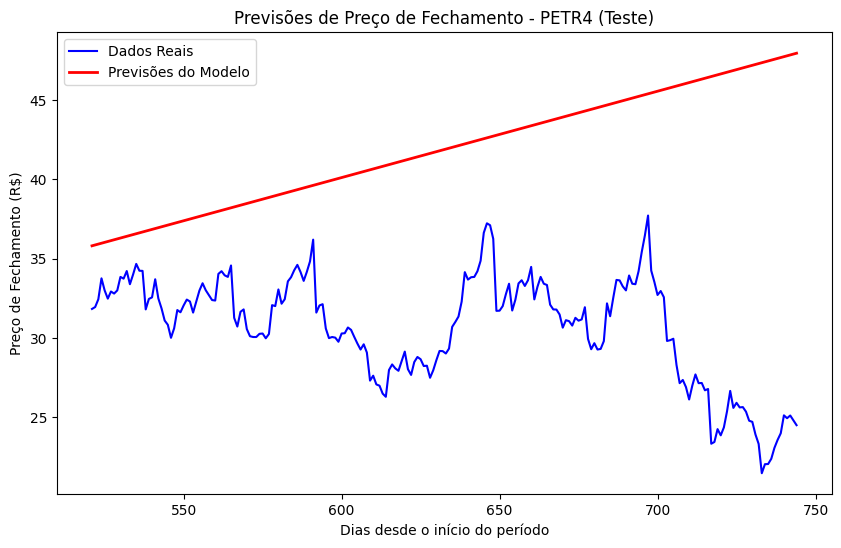

In [77]:
# Vamos plotar as previsões do modelo em comparação com os dados reais.
plt.figure(figsize=(10,6))
plt.plot(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Previsões do Modelo')
plt.title('Previsões de Preço de Fechamento - PETR4 (Teste)')
plt.xlabel('Dias desde o início do período')
plt.ylabel('Preço de Fechamento (R$)')
plt.legend()
plt.show()


## 8. Conclusão
Usamos o autograd para treinar um modelo de regressão linear e prever os preços de fechamento da PETR4.